# Capstone Project - The Battle of Neighborhoods

###  : Recommend neighborhood of Bangkok for Authentic Thai restaurant

# 1. Discussion and Background of the Business Problem:

# [Thai Restaurant]

### Introduction Section

This final project explores the best locations for Authentic Thai restaurants throughout the Bangkok, Thailand.  

Bangkok is one of the world's top tourist destinations. Of 162 cities worldwide, MasterCard ranked Bangkok as the top destination city by international visitor arrivals in its Global Destination Cities Index 2018, ahead of London, with just over 20 million overnight visitors in 2017 

As the main gateway through which visitors arrive in Thailand, Bangkok is visited by the majority of international tourists to the country. Domestic tourism is also prominent. The Department of Tourism recorded 26,861,095 Thai and 11,361,808 foreign visitors to Bangkok in 2010. Lodgings were made by 15,031,244 guests, who occupied 49.9 percent of the city's 86,687 hotel rooms. Bangkok also topped the list as the world's most popular tourist destinations in 2017 rankings

With its diverse culture, comes diverse food items. There are many restaurants in Bangkok City, each belonging to different categories like Thai, Japanese Chinese, Indian, French, etc.

So. this project will help to recommending the top venues in each neighborhood of Bangkok. For Foreigner traveler, Business man, ect. Who want to have experience with Authentic Thai restaurant, 

Reference from https://en.wikipedia.org/wiki/Bangkok

### Target Audience

- Traveler who want to have experience with Authentic Thai restaurant
- Business personnel who wants to invest or open a restaurant.
- Finding the best location for opening a restaurant


# 2. Data section


### Bangkok Neighborhoods Data


Beautiful soup web scraping is used to scrap the list of 50 districts of Bangkok from the following url: https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok

### Foursquare API:

Four-square API as its prime data gathering source. Many organizations are using to geo-tag their photos with detailed info about a destination

This API provides the ability to perform location search, location sharing and details about a business.

# 3. Methodology

### 3.1. Business Understanding

The aim of this project is to find the best neighborhood of Bangkok to recommend Foreigner traveler to get experience with Authentic Thai restaurant

### 3.2. Analytical Approach

The total number of neighborhoods in Bangkok are 50 so we need to find a way to cluster them based on their similarities, that are the number and the kind of restaurant.

Briefly, after some steps of Data Cleaning and Data Exploration, I will use a K-Means algorithm to extract the clusters, produce a map and make an argument on the final result.

### 3.3. Data Exploration

To explore the data, I will use “Folium” a python library that can create interactive leaflet map using coordinate data.
The code above is an example how to check the centroids of every neighborhood in Bangkok.

In [1]:
#import library 
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 
import pandas as pd
import numpy as np

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use Webscraping to Extract List of districts of Bangkok

Use the `requests` library to download the webpage https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok. Save the text of the response as a variable named `html_data`.


In [2]:
url = " https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text
soup = BeautifulSoup(data,'html.parser')


In [3]:
soup.title.string

'List of districts of Bangkok - Wikipedia'

In [4]:
## This returns a list containing all the tables in the HTML
soup.find_all('table')

## How many tables are there in this HTML? 
len(soup.find_all('table'))

2

In [5]:
table = soup.find('table',{'class':'wikitable sortable'})
table

<table class="wikitable sortable">
<tbody><tr align="center" style="background:#d8edff">
<th>District<br/>(<i>Khet</i>)</th>
<th>Map<br/>Nr</th>
<th>Post-<br/>code</th>
<th>Thai</th>
<th>Popu-<br/>lation<br/></th>
<th>No. of<br/>Subdis-<br/>tricts<br/><i>Khwaeng</i>
</th>
<th>Latitude
</th>
<th>Longitude
</th></tr>
<tr>
<td><a href="/wiki/Bang_Bon_District" title="Bang Bon District">Bang Bon</a></td>
<td>50</td>
<td>10150</td>
<td>บางบอน</td>
<td align="right">105,161</td>
<td>4
</td>
<td>13.6592
</td>
<td>100.3991
</td></tr>
<tr>
<td><a href="/wiki/Bang_Kapi_District" title="Bang Kapi District">Bang Kapi</a></td>
<td>6</td>
<td>10240</td>
<td>บางกะปิ</td>
<td align="right">148,465</td>
<td>2
</td>
<td>13.765833
</td>
<td>100.647778
</td></tr>
<tr>
<td><a href="/wiki/Bang_Khae_District" title="Bang Khae District">Bang Khae</a></td>
<td>40</td>
<td>10160</td>
<td>บางแค</td>
<td align="right">191,781</td>
<td>4
</td>
<td>13.696111
</td>
<td>100.409444
</td></tr>
<tr>
<td><a href="/wiki/B

 each table header is defined with a "th" tag. So, we could just look up all the th elements within the table.

In [6]:
headers = [header.text.strip() for header in table.find_all('th')]
headers

['District(Khet)',
 'MapNr',
 'Post-code',
 'Thai',
 'Popu-lation',
 'No. ofSubdis-trictsKhwaeng',
 'Latitude',
 'Longitude']

Let’s now parse the rows containing the data, Each table data/cell is defined with a td tag and the entire row resides within a tr tag.

In [7]:
rows = []

# Find all `tr` tags
data_rows = table.find_all('tr')

for row in data_rows:
    value = row.find_all('td')
    beautified_value = [ele.text.strip() for ele in value]
    # Remove data arrays that are empty
    if len(beautified_value) == 0:
        continue
    rows.append(beautified_value)


Tranform the data into a _pandas_ dataframe

In [8]:
# define the dataframe columns
df = pd.DataFrame(rows, columns = headers)
df.head()

,District(Khet),MapNr,Post-code,Thai,Popu-lation,No. ofSubdis-trictsKhwaeng,Latitude,Longitude
0,Bang Bon,50,10150,บางบอน,"105,161",4,13.6592,100.3991
1,Bang Kapi,6,10240,บางกะปิ,"148,465",2,13.765833,100.647778
2,Bang Khae,40,10160,บางแค,"191,781",4,13.696111,100.409444
3,Bang Khen,5,10220,บางเขน,"189,539",2,13.873889,100.596389
4,Bang Kho Laem,31,10120,บางคอแหลม,"94,956",3,13.693333,100.5025


In [9]:
#clean dataframe 
df_bangkok =df.drop(['MapNr','Thai','Post-code', 'Thai','Popu-lation', 'No. ofSubdis-trictsKhwaeng'], axis = 1)
df_bangkok.head()

,District(Khet),Latitude,Longitude
0,Bang Bon,13.6592,100.3991
1,Bang Kapi,13.765833,100.647778
2,Bang Khae,13.696111,100.409444
3,Bang Khen,13.873889,100.596389
4,Bang Kho Laem,13.693333,100.5025


### Explore Neighborhoods in Bangkok



Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = '2L1MGRX3NSBDJCRLRLUZYIODBKYQ3R0ZVSBXT44RE0UCS0IQ' # your Foursquare ID
CLIENT_SECRET = '42ZNETTE4GJN4EBD0BS2PGBKBQ0W1BGMNRXUGE3LP2A5Q0IV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2L1MGRX3NSBDJCRLRLUZYIODBKYQ3R0ZVSBXT44RE0UCS0IQ
CLIENT_SECRET:42ZNETTE4GJN4EBD0BS2PGBKBQ0W1BGMNRXUGE3LP2A5Q0IV


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
bangkok_venues =  getNearbyVenues(names = df_bangkok['District(Khet)'], latitudes = df_bangkok['Latitude'] , longitudes =df_bangkok['Longitude'])

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


In [13]:
print(bangkok_venues.shape)
bangkok_venues.head()

(2905, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center
3,Bang Bon,13.6592,100.3991,เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น,13.654137,100.405323,Noodle House
4,Bang Bon,13.6592,100.3991,ส.สุขโภชนา,13.660358,100.404866,Chinese Restaurant


Let's check how many venues were returned for each neighborhood

In [14]:
bangkok_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bang Bon,22,22,22,22,22,22
Bang Kapi,100,100,100,100,100,100
Bang Khae,26,26,26,26,26,26
Bang Khen,63,63,63,63,63,63
Bang Kho Laem,55,55,55,55,55,55
Bang Khun Thian,79,79,79,79,79,79
Bang Na,23,23,23,23,23,23
Bang Phlat,33,33,33,33,33,33
Bang Rak,100,100,100,100,100,100


Let's find out how many unique categories can be curated from all the returned venues

In [15]:
print('There are {} uniques categories.'.format(len(bangkok_venues['Venue Category'].unique())))

There are 234 uniques categories.


### Analyze Each Neighborhood

In [16]:
# one hot encoding
bangkok_onehot = pd.get_dummies(bangkok_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangkok_onehot['neighborhood'] = bangkok_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangkok_onehot.columns[-1]] + list(bangkok_onehot.columns[:-1])
bangkok_onehot = bangkok_onehot[fixed_columns]

bangkok_onehot.head()

,neighborhood,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Canal,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Port,Pub,Racetrack,Ramen Restaurant,Recording Studio,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Roof Deck,Rooftop Bar,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [17]:
bangkok_onehot.shape

(2905, 235)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [18]:
bangkok_grouped = bangkok_onehot.groupby('neighborhood').mean().reset_index()
bangkok_grouped.head()

,neighborhood,Accessories Store,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Canal,Cantonese Restaurant,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Stadium,Comfort Food Restaurant,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Shop,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Floating Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Driving Range,Government Building,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Hainan Restaurant,Halal Restaurant,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Leather Goods Store,Library,Light Rail Station,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Venue,Neighborhood,Night Market,Nightclub,Noodle House,Office,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pet Café,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Port,Pub,Racetrack,Ramen Restaurant,Recording Studio,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Roof Deck,Rooftop Bar,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Som Tum Restaurant,Soup Place,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Toll Booth,Toll Plaza,Tonkatsu Restaurant,Tour Provider,Track,Train Station,Tunnel,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Wine Bar,Wings Joint,Zoo,Zoo Exhibit
0,Bang Bon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.045455,0.0,0.0,0.0,0.090909,0.0,0.0,0.00,0.0,0.090909,0.0,0.0,0.0,0.00,0.136364,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.045455,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.045455,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.00,0.00,0.000000,0.00

Let's confirm the new size

In [19]:
bangkok_grouped.shape

(50, 235)

extract only the Neighborhood and Thai Restaurant column for further analysis:

In [20]:
bangkok_grouped_thai_res = bangkok_grouped[['neighborhood', 'Thai Restaurant']]
bangkok_grouped_thai_res.columns = ['neighborhood','Mean_of_frequency_ThaiRes']
bangkok_grouped_thai_res.head()

,neighborhood,Mean_of_frequency_ThaiRes
0,Bang Bon,0.090909
1,Bang Kapi,0.040000
2,Bang Khae,0.000000
3,Bang Khen,0.015873
4,Bang Kho Laem,0.127273


### Clustering the Neighborhoods:

We will extract Thai restaurant data from the above table and fit this into the code for finding the best value of K.

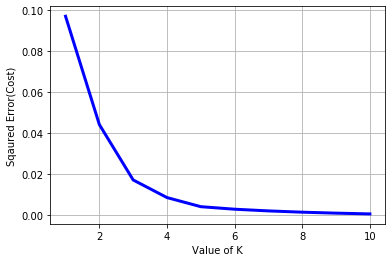

In [21]:
bangkok_grouped_clustering = bangkok_grouped_thai_res.drop('neighborhood', 1)
cost = []


for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 500)
    kmeans.fit(bangkok_grouped_clustering)
    
    #claculates squared error
    #for the clustered poiints
    cost.append(kmeans.inertia_)
    
#plot the cost againt K values
plt.plot(range(1,11), cost, color = 'b', linewidth = '3')
plt.xlabel('Value of K')
plt.ylabel('Sqaured Error(Cost)')
plt.grid()
plt.show()

Run _k_-means to cluster the neighborhood into 4 clusters.

In [22]:
# set number of clusters
kclusters = 3

bangkok_grouped_clustering = bangkok_grouped_thai_res.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangkok_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0,
       0, 2, 2, 2, 0, 2])

In [23]:
bangkok_venues.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center


In [24]:
bangkok_grouped_thai_res.head(3)

,neighborhood,Mean_of_frequency_ThaiRes
0,Bang Bon,0.090909
1,Bang Kapi,0.040000
2,Bang Khae,0.000000


In [25]:
# add clustering labels
bangkok_grouped_thai_res.insert(0, 'Cluster Labels', kmeans.labels_)

bangkok_merged = bangkok_venues

#merge Mean_of_frequency_ThaiRes and cluster label into bangkok_venues
bangkok_merged = bangkok_merged.join(bangkok_grouped_thai_res.set_index('neighborhood'), on ='Neighborhood')
bangkok_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.090909
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant,2,0.090909
2,Bang Bon,13.6592,100.3991,ร้านต้นไม้ ริมถนนกาญจนาภิเษก,13.654098,100.405054,Garden Center,2,0.090909
3,Bang Bon,13.6592,100.3991,เจ๊ไน้ ก๋วยเตี๋ยวเป็ดตุ๋น,13.654137,100.405323,Noodle House,2,0.090909
4,Bang Bon,13.6592,100.3991,ส.สุขโภชนา,13.660358,100.404866,Chinese Restaurant,2,0.090909


In [45]:
bangkok_merged_ThaiRes = bangkok_merged[bangkok_merged['Venue Category'] == 'Thai Restaurant']
bangkok_merged_ThaiRes.groupby('Neighborhood')['Mean_of_frequency_ThaiRes'].max().sort_values(ascending=False)

Neighborhood
Chom Thong              0.208333
Saphan Sung             0.200000
Bang Sue                0.177419
Bang Kho Laem           0.127273
Dusit                   0.126761
Huai Khwang             0.120000
Chatuchak               0.118280
Lak Si                  0.111111
Don Mueang              0.105263
Lat Krabang             0.102564
Pom Prap Sattru Phai    0.098765
Wang Thonglang          0.093750
Bang Bon                0.090909
Phaya Thai              0.090000
Phra Nakhon             0.090000
Yan Nawa                0.090000
Bang Na                 0.086957
Thung Khru              0.085106
Sai Mai                 0.083333
Din Daeng               0.083333
Nong Khaem              0.083333
Rat Burana              0.080645
Bang Rak                0.080000
Min Buri                0.076923
Thon Buri               0.076923
Khlong Sam Wa           0.071429
Phasi Charoen           0.071429
Suan Luang              0.063492
Bang Khun Thian         0.063291
Khan Na Yao             0.0602

In [48]:
bangkok_merged_ThaiRes.head(3)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.090909
20,Bang Bon,13.6592,100.3991,ครัวเมืองตรัง นายลิ้ง,13.655233,100.392923,Thai Restaurant,2,0.090909
24,Bang Kapi,13.765833,100.647778,ร้านข้าวแกงครัวปักษ์ใต้คลองจั่น,13.770482,100.648638,Thai Restaurant,0,0.040000


Finally, let's visualize the resulting clusters

Use geopy library to get the latitude and longitude values of Bangkok.

In [27]:
address = 'Bangkok'

geolocator = Nominatim(user_agent="bangkok_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangkok are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangkok are 13.7544238, 100.4930399.


In [28]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangkok_merged_ThaiRes['Venue Latitude'], bangkok_merged_ThaiRes['Venue Longitude'], bangkok_merged_ThaiRes['Neighborhood'], bangkok_merged_ThaiRes['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [29]:
bangkok_merged_ThaiRes.shape

(218, 9)

#### Cluster 1

In [30]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 0, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
24,Bang Kapi,ร้านข้าวแกงครัวปักษ์ใต้คลองจั่น,13.770482,100.648638,Thai Restaurant,0,0.040000
61,Bang Kapi,ก๋วยเตี๋ยวไก่แม่ศรีเรือน (Maesriruen),13.767290,100.642291,Thai Restaurant,0,0.040000
78,Bang Kapi,ร่วมจิตร ปูดอง,13.768422,100.641047,Thai Restaurant,0,0.040000
116,Bang Kapi,ก๊วยเตี๋ยวคั่วไก่ แฮปปี้แลนด์,13.770868,100.641759,Thai Restaurant,0,0.040000
203,Bang Khen,ราชาข้าวต้ม ผักบุ้งลอยฟ้า,13.879080,100.590785,Thai Restaurant,0,0.015873
266,Bang Khun Thian,ไผ่ทองโภชนา,13.662101,100.435264,Thai Restaurant,0,0.063291
277,Bang Khun Thian,ครัวชาวใต้,13.661325,100.434429,Thai Restaurant,0,0.063291
301,Bang Khun Thian,Kanom Jean Bangkok (ขนมจีนบางกอก),13.664232,100.438168,Thai Restaurant,0,0.063291
320,Bang Khun Thian,ต้มยำหัวปลา ผู้ใหญ่,13.661326,100.429309,Thai Restaurant,0,0.063291
321,Bang Khun Thian,S&P (เอส แอนด์ พี),13.664191,100.438027,Thai Restaurant,0,0.063291


#### Cluster 2

In [31]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 1, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
502,Bang Sue,อร่อยในบ้าน,13.808061,100.536540,Thai Restaurant,1,0.177419
510,Bang Sue,Garlic (กาลิค),13.816981,100.537203,Thai Restaurant,1,0.177419
511,Bang Sue,Bella Casa (เบลล่า คาซ่า),13.802068,100.538869,Thai Restaurant,1,0.177419
514,Bang Sue,Seefah (สีฟ้า),13.806301,100.534064,Thai Restaurant,1,0.177419
516,Bang Sue,ตุ๊ก โภชนา,13.805738,100.532540,Thai Restaurant,1,0.177419
518,Bang Sue,บ้านมะขาม,13.807659,100.541167,Thai Restaurant,1,0.177419
531,Bang Sue,"น้ำผึ้งเชียงใหม่ ,ข้าวหมูแดงอบน้ำผึ้ง",13.811903,100.531497,Thai Restaurant,1,0.177419
540,Bang Sue,กะเพราไข่ระเบิด,13.801938,100.535329,Thai Restaurant,1,0.177419
548,Bang Sue,ครัวมือถือ,13.808285,100.541302,Thai Restaurant,1,0.177419
553,Bang Sue,ต้นไทร (อาหารตามสั่ง),13.816934,100.536607,Thai Restaurant,1,0.177419


#### Cluster 3

In [32]:
bangkok_merged_ThaiRes.loc[bangkok_merged_ThaiRes['Cluster Labels'] == 2, bangkok_merged_ThaiRes.columns[[0] + list(range(3, bangkok_merged_ThaiRes.shape[1]))]]

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,Mean_of_frequency_ThaiRes
0,Bang Bon,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant,2,0.090909
20,Bang Bon,ครัวเมืองตรัง นายลิ้ง,13.655233,100.392923,Thai Restaurant,2,0.090909
212,Bang Kho Laem,ห้องอาหารจันทร์เพ็ญ,13.692355,100.504234,Thai Restaurant,2,0.127273
213,Bang Kho Laem,Baan Klang Krung (บ้านกลางกรุง),13.690974,100.503151,Thai Restaurant,2,0.127273
242,Bang Kho Laem,My Story Restaurant,13.694966,100.494623,Thai Restaurant,2,0.127273
249,Bang Kho Laem,ร้านอาหารตามสั่ง,13.693756,100.505535,Thai Restaurant,2,0.127273
255,Bang Kho Laem,ป้าพร จิ้มจุ่ม เนื้อย่าง,13.696787,100.496862,Thai Restaurant,2,0.127273
260,Bang Kho Laem,โอเค - หมี่ปู กระเพาะปลา,13.695162,100.494762,Thai Restaurant,2,0.127273
263,Bang Kho Laem,Chon Thong (ช้อนทอง),13.697324,100.510461,Thai Restaurant,2,0.127273
349,Bang Na,ครัวต้นหอม,13.674818,100.596762,Thai Restaurant,2,0.086957


## Result


The results of the exploratory data analysis and clustering is summarized below :

- Cluster 2 represent high density of Thai restaurants.
- Chom Thong Neighborhood has high density of Thai restaurants.
